# <b>Trabalho 01 - Análise e tratamento dos dados</b>
#### <b>Maria Gabriele Bezerra da Silva - 403736</b>

Para dar início ao tratamento, iremos apresentar os 4 datasets que serão trabalhados durante o desenvolvimento deste trabalho:


1. Iris;	
2. Diabetes;
3. Wine;
4. California.







#Importando Datasets


In [ ]:
# Recuperando os datasets através da biblioteca scikit-learn
# carregando dataset Iris
from sklearn.datasets import load_iris
iris = load_iris()

# carregando dataset Diabetes
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# carregando dataset Wine
from sklearn.datasets import load_wine
wine = load_wine()

# carregando dataset California Housing
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

#Importando bibliotecas do Numpy

In [ ]:
# Importando bibliotecas numpy
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [ ]:
from scipy.stats.mstats import gmean,hmean
from scipy import stats

#Importando bibliotecas do Pandas




In [ ]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Analisando Dataset Iris

##Acessando Dataset

Utilizando a biblioteca do Pandas para transformar os dados em DataFrame:

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

Acessando os dados do meu DataFrame para plotar os histogramas:





In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


##Calculando Medidas de Assimetria

Plotando os histogramas dos atributos presentes na base Iris:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

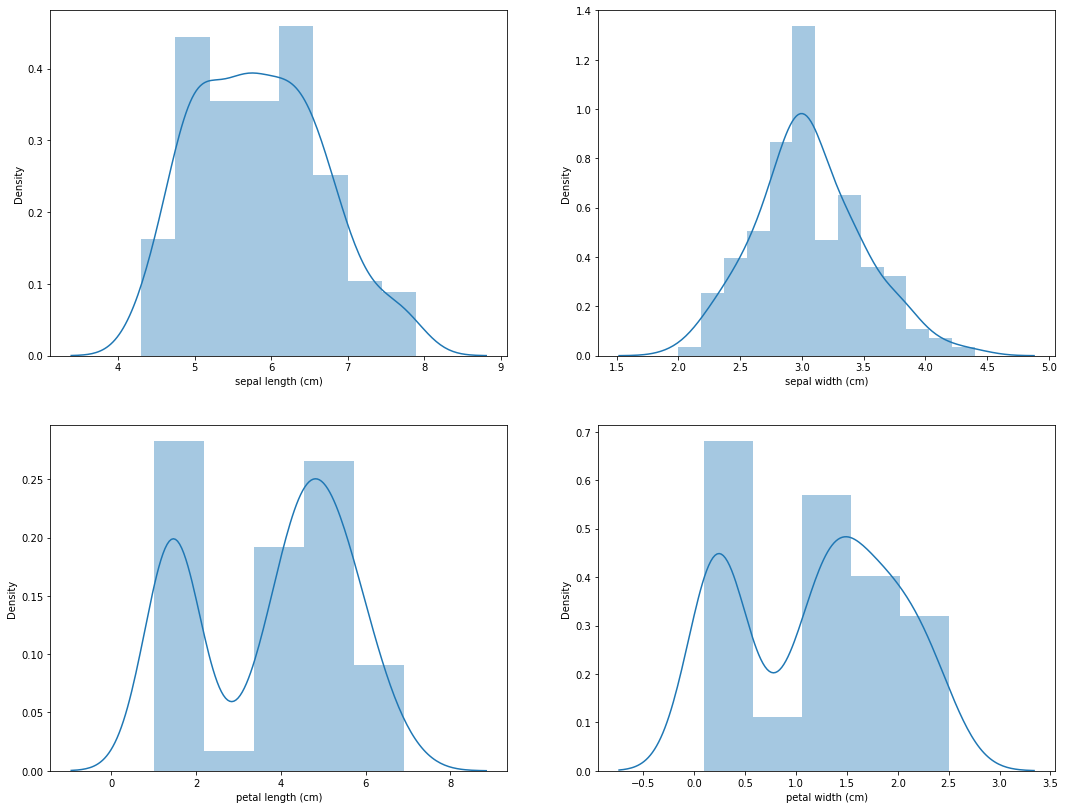

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18, 14))
for i, column in enumerate(iris_df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(iris_df[column],ax=axes[i//2,i%2])

Visualizando a distribuição:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

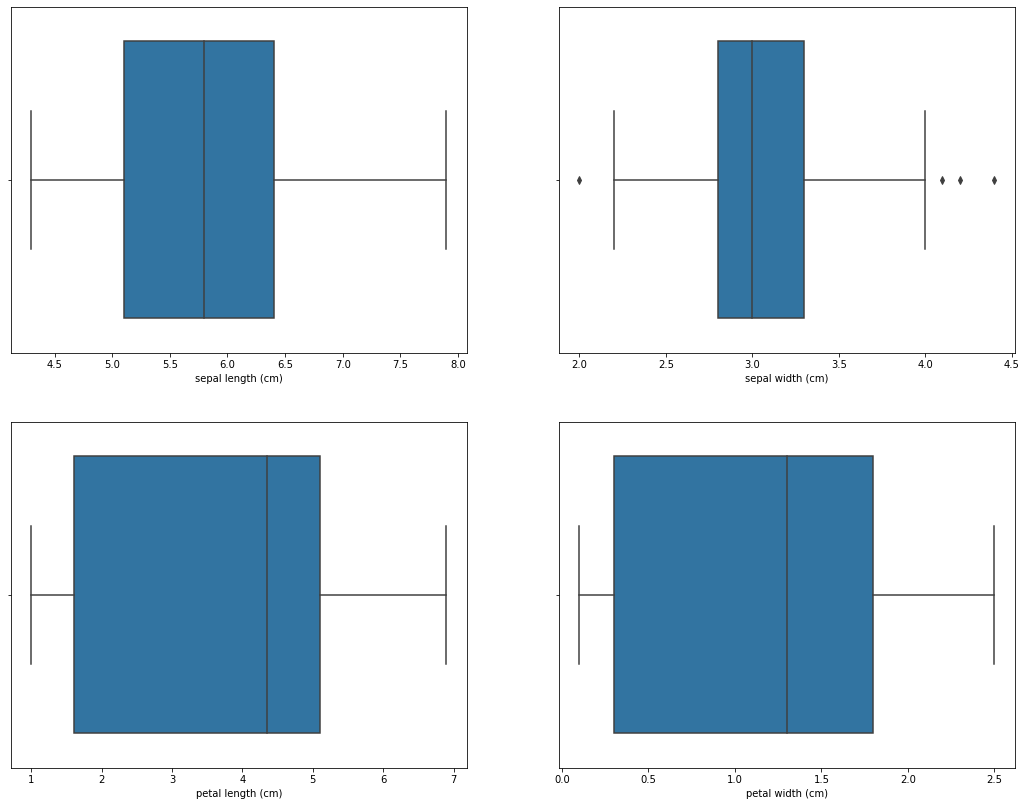

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18, 14))
for i, column in enumerate(iris_df.select_dtypes(include=np.number).columns.tolist()):
    sns.boxplot(iris_df[column],ax=axes[i//2,i%2])

Importando bibliotecas que nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew
%matplotlib inline

Definindo função para calcular estatísticas:

In [ ]:
def calcula_estatisticas(data):
  mean = np.round(np.mean(data),2)
  mode = np.round(stats.mode(data,)[0][0],2)
  median = np.round(np.median(data),2)
  var = np.round(np.var(data),2)
  std = np.round(np.std(data),2)
  coef_pearson = np.round(stats.skew(data),2)
  coef_kurtosis = np.round(kurtosis(data),2)
  msg = print("Media:\n{}\n\nModa: {}\n\nMediana: {}\n\nVariância:\n{}\n\nDesvio Padrão:\n{}\n\nCoeficiente Person: {}\n\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

Usando como amostra a base IRIS:

In [ ]:
calcula_estatisticas(iris_df)

Media:
sepal length (cm)    5.84
sepal width (cm)     3.06
petal length (cm)    3.76
petal width (cm)     1.20
dtype: float64

Moda: [5.  3.  1.4 0.2]

Mediana: 3.2

Variância:
sepal length (cm)    0.68
sepal width (cm)     0.19
petal length (cm)    3.10
petal width (cm)     0.58
dtype: float64

Desvio Padrão:
sepal length (cm)    0.83
sepal width (cm)     0.43
petal length (cm)    1.76
petal width (cm)     0.76
dtype: float64

Coeficiente Person: [ 0.31  0.32 -0.27 -0.1 ]

Coeficiente de Kurtosi: [-0.57  0.18 -1.4  -1.34]


## Fundamento teórico da analise do dataset

**COEFICIENTE DE ASSIMETRIA:**

1. Quando a média for igual a moda (AS = 0), a distribuição será simétrica, terá ausência de assimetria.
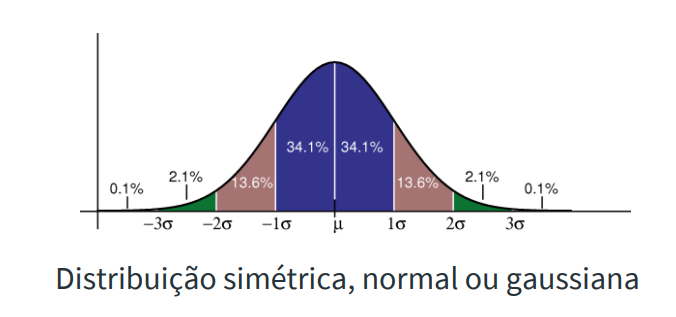
2. Quando a média for menor que a moda (AS < 0), a distribuição será assimétrica à esquerda ou negativa.
3. Quando a média for maior que a moda (AS > 0), a distribuição será assimétrica à direita ou positiva.
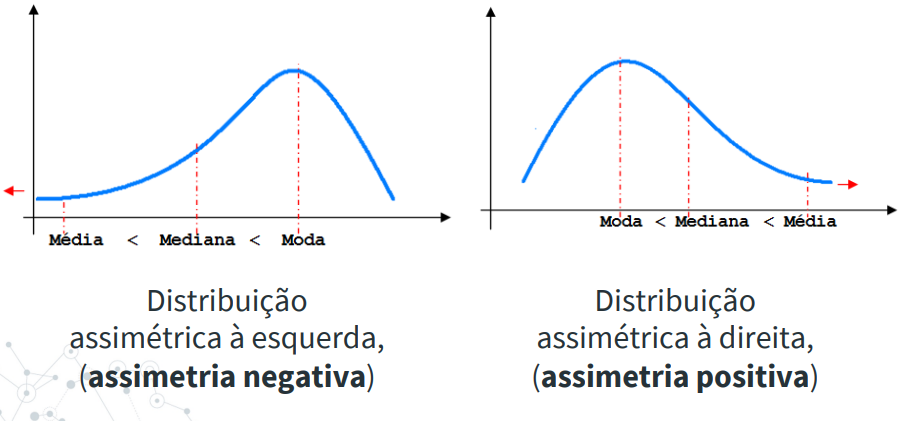



##Conclusões



Através do Diagrama de Box-Plot ou Diagrama de Caixas, foi possível analisar a 
assimetria da distribuição, presença de outliers
(Valores Atípicos) e da Variabilidade dos dados, por meio da
amplitude (Máx-Min).

Analisando é possível perceber que os atributos **sepal width** e **sepal length** foram os atributos mais simétricos, ou seja, que apresentaram *distribuição normal ou gaussiana* em relação aos outros. Ambos com 3.06 e 5.84 de média, respectivamente, sendo os mais próximos da moda, 3 e 5, respectivamente.

Além disso, também foi possível analisar que os atributos **petal width** e **petal length** apresentaram *distribuição assimétrica a direita*, ou seja, *positiva*, pois suas médias são maiores que suas modas.


#Analisando Dataset Diabetes

##Acessando Dataset

Acessando os dados em DataFrame:

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

Acessando os dados do meu DataFrame para plotar os histogramas:

In [ ]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


##Calculando Medidas de Assimetria

Plotando gráficos para análise:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

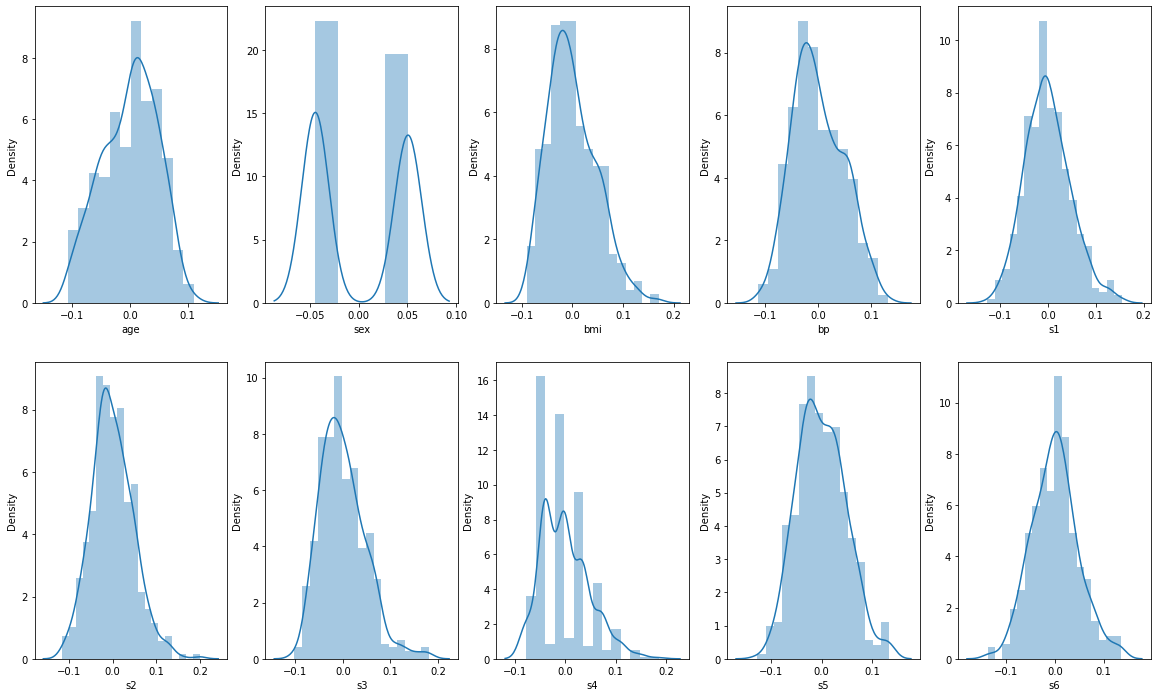

In [77]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(20, 12))
for i, column in enumerate(diabetes_df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(diabetes_df[column],ax=axes[i//5,i%5])

Visualizando distribuição:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

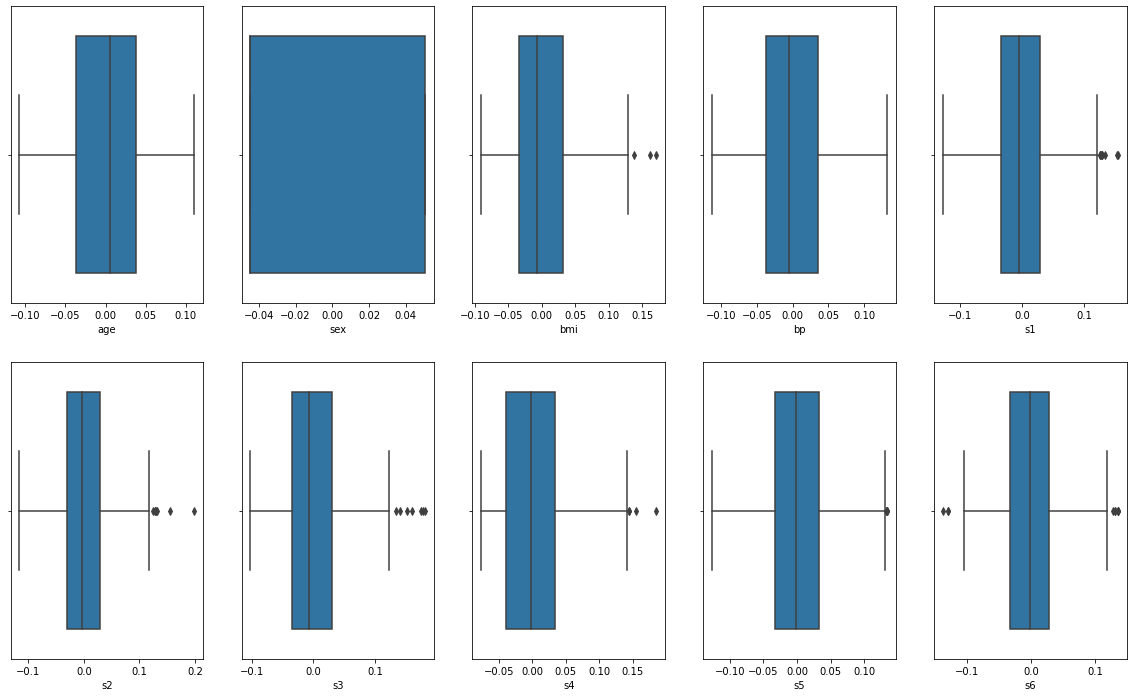

In [80]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(20, 12))
for i, column in enumerate(diabetes_df.select_dtypes(include=np.number).columns.tolist()):
    sns.boxplot(diabetes_df[column],ax=axes[i//5,i%5])

Definindo função para calcular estatísticas:

In [81]:
def calcula_estatisticas(data):
  mean = np.round(np.mean(data),2)
  mode = np.round(stats.mode(data,)[0][0],2)
  median = np.round(np.median(data),2)
  var = np.round(np.var(data),2)
  std = np.round(np.std(data),2)
  coef_pearson = np.round(stats.skew(data),2)
  coef_kurtosis = np.round(kurtosis(data),2)
  msg = print("Media:\n{}\n\nModa: {}\n\nMediana: {}\n\nVariância:\n{}\n\nDesvio Padrão:\n{}\n\nCoeficiente Person: {}\n\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

Após a plotagem dos gráficos foi escolhido o atributo S1, por aparentemente parecer um atributo simétrico, e o atributo S4 por apresentar graficamente um certo grau de assimetria.

Primeiramente limpamos os dados dos dois atributos para melhor análise:

In [87]:
diabetes_df['s1'] = [str(x).replace('.', '') for x in diabetes_df['s1']]

In [91]:
diabetes_df['s4'] = [str(x).replace('.', '') for x in diabetes_df['s4']]

Verificando dados após limpeza:

In [92]:
diabetes_df.head(7)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-00442234984244464,-0.034821,-0.043401,-000259226199818282,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-000844872411121698,-0.019163,0.074412,-00394933828740919,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-00455994512826475,-0.034194,-0.032356,-000259226199818282,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,00121905687618,0.024991,-0.036038,00343088588777263,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,000393485161259318,0.015596,0.008142,-000259226199818282,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-00689906498720667,-0.079288,0.041277,-0076394503750001,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0040095639849843,-0.024800,0.000779,-00394933828740919,-0.062913,-0.038357


Transformando os dados para o formato numérico.

In [94]:
diabetes_df['s1']=pd.to_numeric(diabetes_df['s1'],errors='coerce')

In [95]:
diabetes_df['s4']=pd.to_numeric(diabetes_df['s4'],errors='coerce')

Calculando dados estatísticos dos dois atributos escolhidos:

In [96]:
calcula_estatisticas(diabetes_df.s1)

Media:
-56096401278645.22

Moda: -707277125301585

Mediana: -106829353472597.5

Variância:
2.1345666955401373e+29

Desvio Padrão:
462013711435076.06

Coeficiente Person: 0.11

Coeficiente de Kurtosi: -0.72


In [97]:
calcula_estatisticas(diabetes_df.s4)

Media:
-60430482250274.66

Moda: -394933828740919

Mediana: -259226199818282.0

Variância:
1.4514327916096203e+29

Desvio Padrão:
380976743595934.0

Coeficiente Person: 0.77

Coeficiente de Kurtosi: -0.52


## Fundamento teórico da analise do dataset

**COEFICIENTE DE ASSIMETRIA:**

1. Quando a média for igual a moda (AS = 0), a distribuição será simétrica, terá ausência de assimetria.
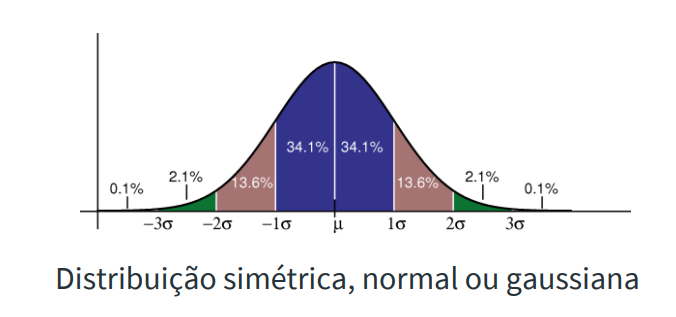
2. Quando a média for menor que a moda (AS < 0), a distribuição será assimétrica à esquerda ou negativa.
3. Quando a média for maior que a moda (AS > 0), a distribuição será assimétrica à direita ou positiva.
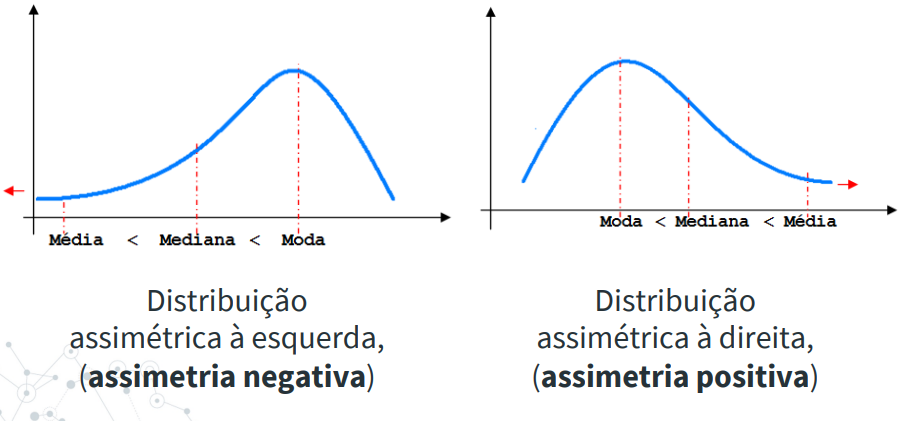



##Conclusões



Através do Diagrama de Box-Plot ou Diagrama de Caixas, foi possível analisar a 
assimetria da distribuição, presença de outliers
(Valores Atípicos) e da Variabilidade dos dados, por meio da
amplitude (Máx-Min).

Analisando é possível perceber que o atributo **S1** apresenta ***média aritmética maior que a moda*** dos seus dados, logo não é um atributo simétrico, mas que apresenta ***distribuição assimétrica à direita ou positiva***

Fazendo a análise do segundo atributo, **S4** apresenta ***média aritmética menor que a moda***, logo, também podemos concluir que é um atributo que nao apresenta simetria, mas que apresenta ***distribuição assimétrica à esquerda ou negativa.***

#Analisando Dataset Wine

##Acessando Dataset

Acessando os dados em DataFrame:

In [98]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

Acessando os dados do meu DataFrame para plotar os histogramas:

In [99]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [100]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [101]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

##Calculando Medidas de Assimetria

Plotando gráficos para análise:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

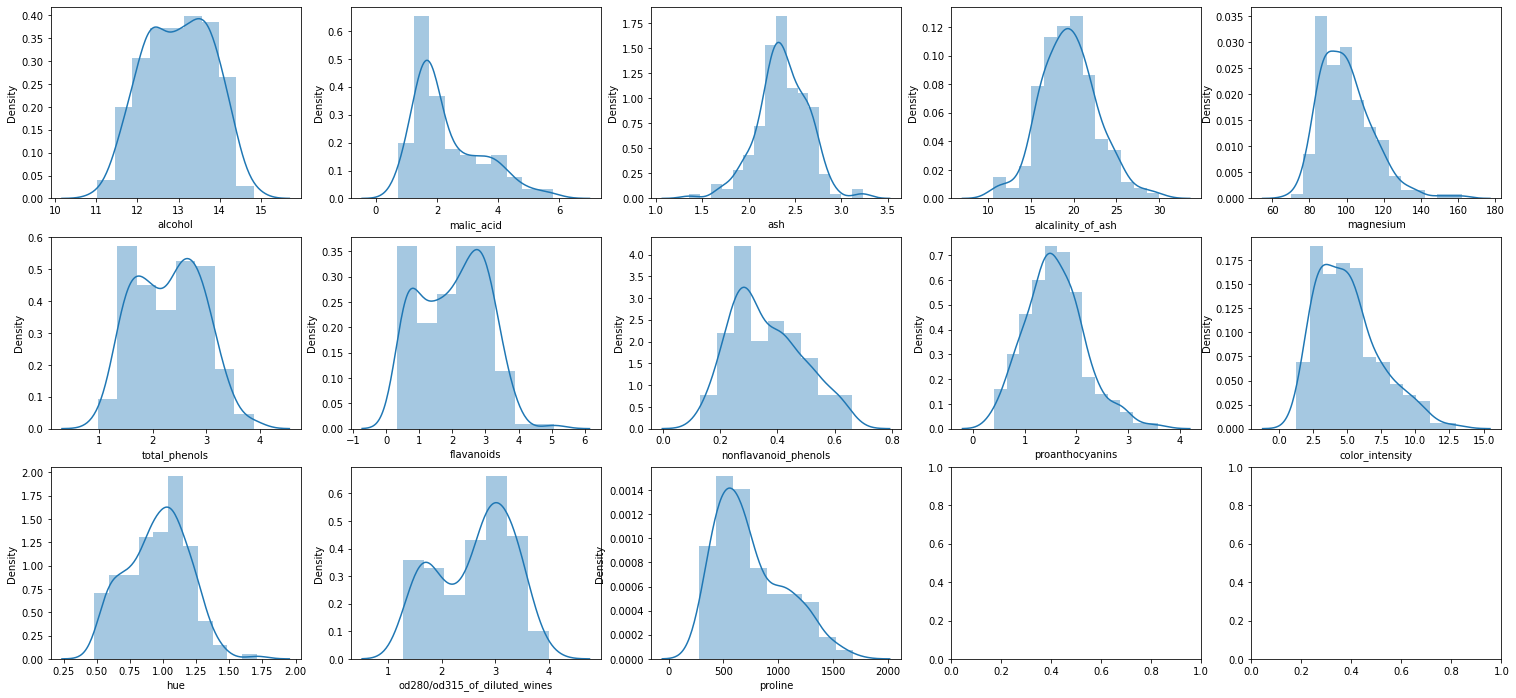

In [107]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(26, 12))
for i, column in enumerate(wine_df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(wine_df[column],ax=axes[i//5,i%5])

Visualizando distribuição:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

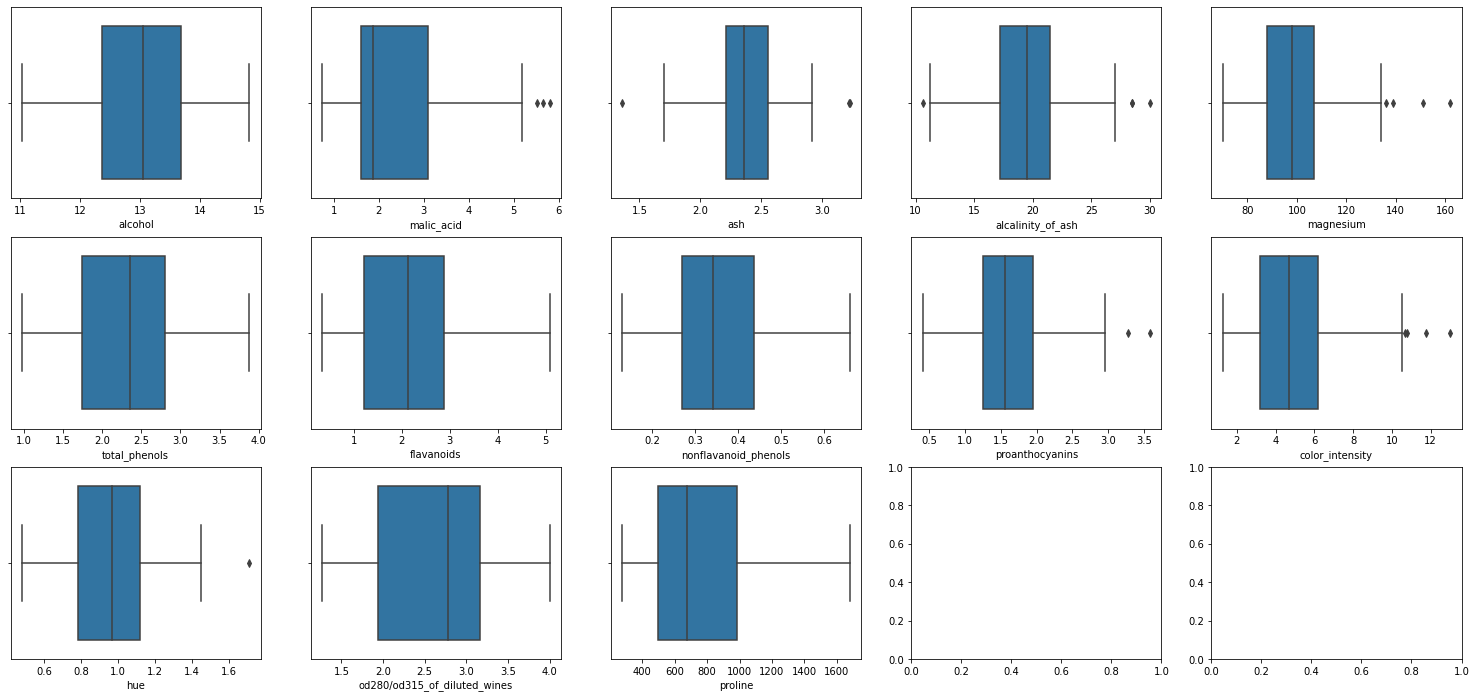

In [110]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(26, 12))
for i, column in enumerate(wine_df.select_dtypes(include=np.number).columns.tolist()):
    sns.boxplot(wine_df[column],ax=axes[i//5,i%5])

Definindo função para calcular estatísticas:

In [ ]:
def calcula_estatisticas(data):
  mean = np.round(np.mean(data),2)
  mode = np.round(stats.mode(data,)[0][0],2)
  median = np.round(np.median(data),2)
  var = np.round(np.var(data),2)
  std = np.round(np.std(data),2)
  coef_pearson = np.round(stats.skew(data),2)
  coef_kurtosis = np.round(kurtosis(data),2)
  msg = print("Media:\n{}\n\nModa: {}\n\nMediana: {}\n\nVariância:\n{}\n\nDesvio Padrão:\n{}\n\nCoeficiente Person: {}\n\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

Após a plotagem dos gráficos foi escolhido o atributo **ALCOHOL**, por aparentemente parecer o atributo mais simétrico entre todos os analisados, e o atributo **MALIC_ACID** por apresentar graficamente um certo grau de assimetria.

OBSERVAÇÃO: Neste dataset não foram limpados os dados por serem dados mais fáceis de trabalhar, mesmo sendo decimais. Em comparação a base diabetes que por serem dados muito pequenos e com mutias casas, houve a necessidade de limpar os dados.

Calculando dados estatísticos dos dois atributos escolhidos:

In [111]:
calcula_estatisticas(wine_df.alcohol)

Media:
13.0

Moda: 12.37

Mediana: 13.05

Variância:
0.66

Desvio Padrão:
0.81

Coeficiente Person: -0.05

Coeficiente de Kurtosi: -0.86


In [112]:
calcula_estatisticas(wine_df.malic_acid)

Media:
2.34

Moda: 1.73

Mediana: 1.87

Variância:
1.24

Desvio Padrão:
1.11

Coeficiente Person: 1.03

Coeficiente de Kurtosi: 0.26


## Fundamento teórico da analise do dataset

**COEFICIENTE DE ASSIMETRIA:**

1. Quando a média for igual a moda (AS = 0), a distribuição será simétrica, terá ausência de assimetria.
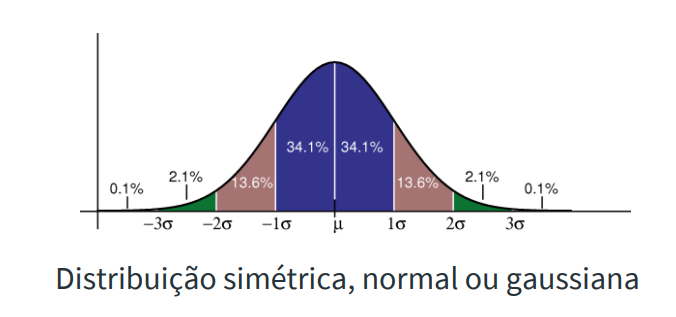
2. Quando a média for menor que a moda (AS < 0), a distribuição será assimétrica à esquerda ou negativa.
3. Quando a média for maior que a moda (AS > 0), a distribuição será assimétrica à direita ou positiva.
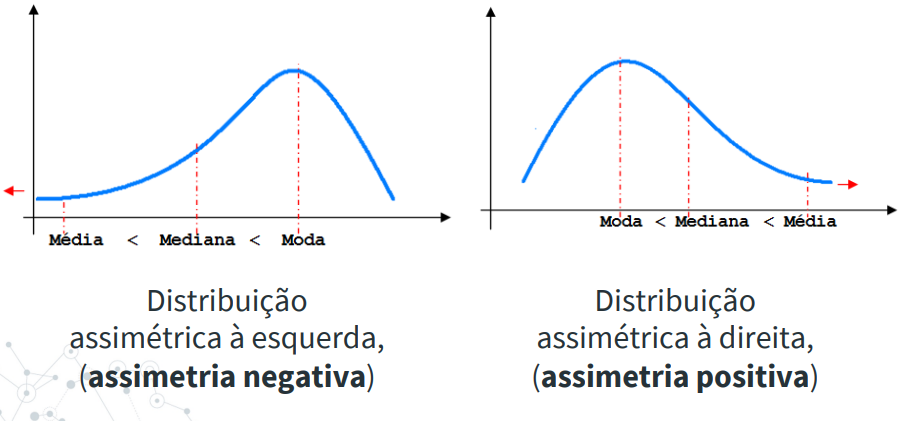



##Conclusões



Através do Diagrama de Box-Plot ou Diagrama de Caixas, foi possível analisar a 
assimetria da distribuição, presença de outliers
(Valores Atípicos) e da Variabilidade dos dados, por meio da
amplitude (Máx-Min).

Analisando é possível perceber que tanto o atributo **ALCOHOL** quanto o atributo **MALIC_ACID** apresentam ***média aritmética maior que a moda*** dos seus dados, logo ambos apresentam ***distribuição assimétrica à direita ou positiva***

Porém existem ressalvas a fazer, principalmente em relação ao atributo ALCOHOL que apresentou diferença mínimo em relação a média (13.0) e moda (12.37), logo podemos concluir que em relação aos outros atributos, este seria o mais simétrico entre eles.

#Analisando Dataset California

##Acessando Dataset

Acessando os dados em DataFrame:

In [114]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)

Acessando os dados do meu DataFrame para plotar os histogramas:

In [115]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [116]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [118]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


##Calculando Medidas de Assimetria

Plotando gráficos para análise:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

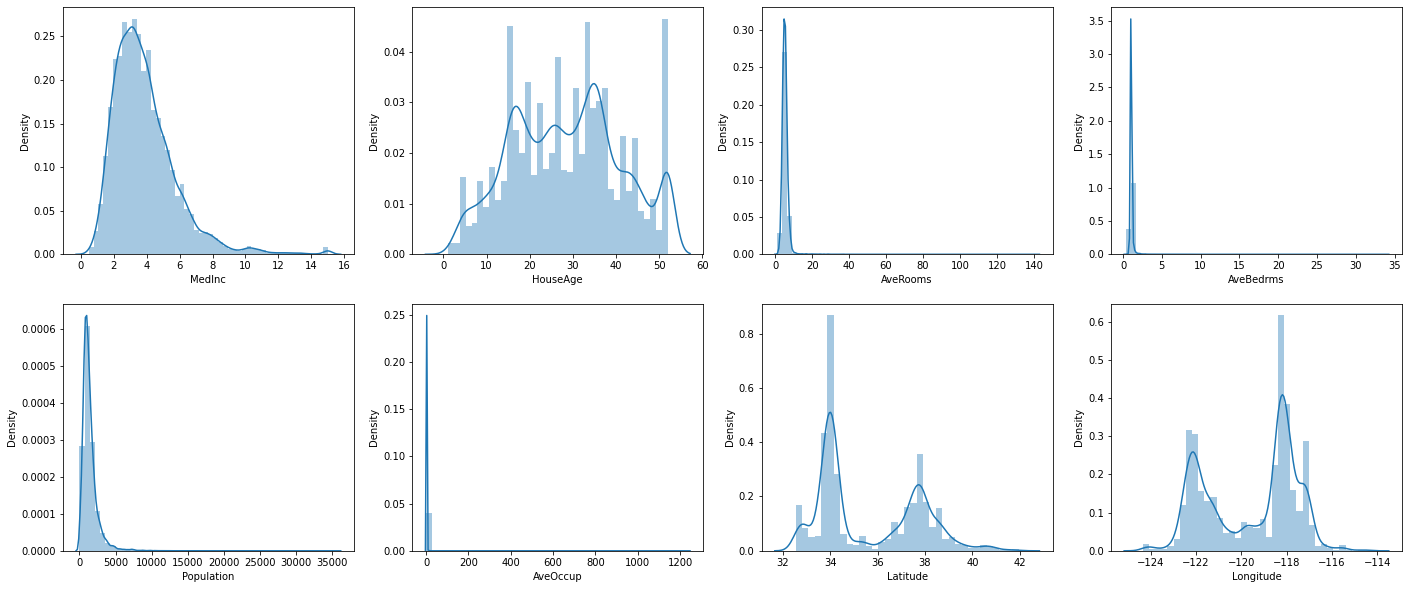

In [124]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(24, 10))
for i, column in enumerate(california_df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(california_df[column],ax=axes[i//4,i%4])

Visualizando distribuição:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

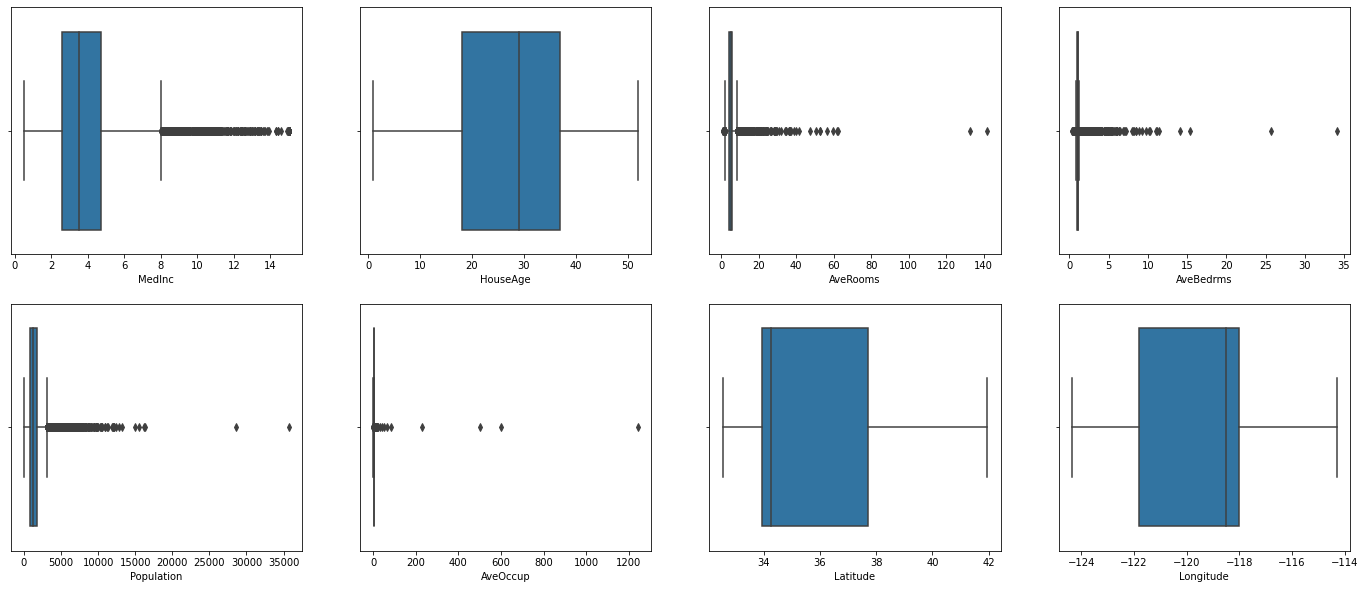

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(24, 10))
for i, column in enumerate(california_df.select_dtypes(include=np.number).columns.tolist()):
    sns.boxplot(california_df[column],ax=axes[i//4,i%4])

Definindo função para calcular estatísticas:

In [126]:
def calcula_estatisticas(data):
  mean = np.round(np.mean(data),2)
  mode = np.round(stats.mode(data,)[0][0],2)
  median = np.round(np.median(data),2)
  var = np.round(np.var(data),2)
  std = np.round(np.std(data),2)
  coef_pearson = np.round(stats.skew(data),2)
  coef_kurtosis = np.round(kurtosis(data),2)
  msg = print("Media:\n{}\n\nModa: {}\n\nMediana: {}\n\nVariância:\n{}\n\nDesvio Padrão:\n{}\n\nCoeficiente Person: {}\n\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

Após a plotagem dos gráficos foi escolhido o atributo **HOUSEAGE**, por ser o que possui maior quantidade de dados para analisar, graficamente e visualmente.
E como segundo foi escolhido o atributo **AVEROOMS** por apresentar uma quantidade muito reduzida de dados, mas que não chega a ser tão reduzida quanto os atributos **AVEOCCUP** e **AVEBEDRMS**, nos permitindo uma melhor análise comparativa.

OBSERVAÇÃO: Neste dataset não foram limpados os dados por serem dados mais fáceis de trabalhar, mesmo sendo decimais. Em comparação a base diabetes que por serem dados muito pequenos e com mutias casas, houve a necessidade de limpar os dados.

Calculando dados estatísticos dos dois atributos escolhidos:

In [127]:
calcula_estatisticas(california_df.HouseAge)

Media:
28.64

Moda: 52.0

Mediana: 29.0

Variância:
158.39

Desvio Padrão:
12.59

Coeficiente Person: 0.06

Coeficiente de Kurtosi: -0.8


In [128]:
calcula_estatisticas(california_df.AveRooms)

Media:
5.43

Moda: 5.0

Mediana: 5.23

Variância:
6.12

Desvio Padrão:
2.47

Coeficiente Person: 20.7

Coeficiente de Kurtosi: 879.14


## Fundamento teórico da analise do dataset

**COEFICIENTE DE ASSIMETRIA:**

1. Quando a média for igual a moda (AS = 0), a distribuição será simétrica, terá ausência de assimetria.
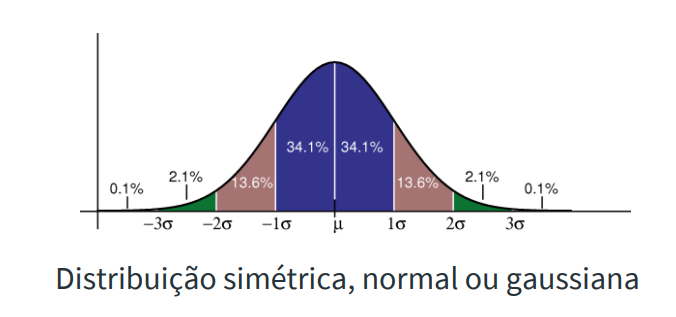
2. Quando a média for menor que a moda (AS < 0), a distribuição será assimétrica à esquerda ou negativa.
3. Quando a média for maior que a moda (AS > 0), a distribuição será assimétrica à direita ou positiva.
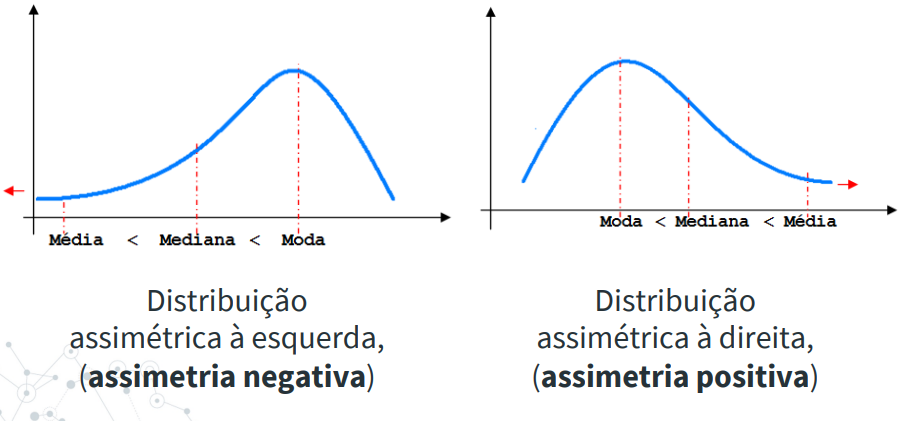



##Conclusões



Através do Diagrama de Box-Plot ou Diagrama de Caixas, foi possível analisar a 
assimetria da distribuição, presença de outliers
(Valores Atípicos) e da Variabilidade dos dados, por meio da
amplitude (Máx-Min).

Analisando é possível perceber que o atributo **HOUSEAGE** apresenta média aritmética menor que sua moda. Logo, usando o fundamento teórico abordado na sessão anterior, podemos concluir que trata-se de uma ***distribuição assimétrica à esquerda ou negativa.***

Além disso, analisando os dados estatísticos do atributo **AVEROOMS** foi possível perceber que mesmo sendo um atributo com poucos dados, ele apresenta simetria, pois sua média aritmética é de 5.43 e sua moda 5.0. Portanto, podemos concluir que este atributo apresenta ***distribuição normal ou gaussiana.***